In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:
def dist(z):
    omega_m = 0.315
    omega_r = 8.24*(10**-5)
    c = 2.998*(10.0**5.0)
    h0 = 70.0
    a = (4.0*omega_r)+(3.0*omega_m)
    b = (6.0*omega_r)+(3.0*omega_m)
    distance = (c/h0)*(z - (a/4.0)*(z**2) + (1.0/3.0)*((3.0*(a**2)/8.0) - (b/2.0))*(z**3))
    return distance

# SDSS 

In [4]:
sdss = pd.read_csv('../data/cmb/sdss.csv')

ra_arr = sdss['ra'].values
dec_arr = sdss['dec'].values
z_arr = sdss['z'].values

print(z_arr)

[0.335709 0.592756 0.279244 ... 0.237574 0.340008 0.050332]


In [5]:
# convert to cartesian coordinates
x_sdss_arr = np.zeros(len(ra_arr))
y_sdss_arr = np.zeros(len(ra_arr))
z_sdss_arr = np.zeros(len(ra_arr))
for i in range(len(ra_arr)):
    dist_val = dist(z_arr[i])
    x_i = dist_val*np.cos(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    y_i = dist_val*np.sin(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    z_i = dist_val*np.sin(np.radians(dec_arr[i]))
    x_sdss_arr[i] = x_i
    y_sdss_arr[i] = y_i
    z_sdss_arr[i] = z_i
    
sdss_ra = ra_arr
sdss_z = z_arr

In [6]:
# print(x_cart_arr)
# x_sdss_arr

# np.std(x_sdss_arr)

# plt.hist(x_cart_arr)
# plt.hist(x_sdss_arr, color='r')

# ACT clusters

In [7]:
cluster_catalog = fits.open('../data/cmb/act_clusters.fits', memmap=True)

In [8]:
cluster_table = Table(cluster_catalog[1].data)

In [9]:
ra_arr = cluster_table['RADeg']
dec_arr = cluster_table['decDeg']
z_arr = cluster_table['redshift']

# print(z_arr)

In [10]:
# convert to cartesian coordinates
x_cart_arr = np.zeros(len(ra_arr))
y_cart_arr = np.zeros(len(ra_arr))
z_cart_arr = np.zeros(len(ra_arr))
for i in range(len(ra_arr)):
    dist_val = dist(z_arr[i])
    x_i = dist_val*np.cos(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    y_i = dist_val*np.sin(np.radians(ra_arr[i]))*np.cos(np.radians(dec_arr[i]))
    z_i = dist_val*np.sin(np.radians(dec_arr[i]))
    x_cart_arr[i] = x_i
    y_cart_arr[i] = y_i
    z_cart_arr[i] = z_i

# Planck Clusters

In [11]:
f = open('../data/cmb/planck_clusters.txt', 'r')
z_planck_vals = []
ra_planck_vals = []
dec_planck_vals = []
for line in f:
    values = line.split('|')
    if values[7].strip() != "":
        z_planck_vals.append(float(values[7]))
        ra_val_arr = values[3].split()
        ra_val = (float(ra_val_arr[0])*15.) + (float(ra_val_arr[1])/4.) + (float(ra_val_arr[2])/240.)
        ra_planck_vals.append(ra_val)
        dec_val_arr = values[4].split()
        if float(dec_val_arr[0])>0:
            dec_val = (float(dec_val_arr[0])) + (float(dec_val_arr[1])/60.) + (float(dec_val_arr[2])/3600.)
        else:
            dec_val = (float(dec_val_arr[0])) - (float(dec_val_arr[1])/60.) - (float(dec_val_arr[2])/3600.)
        dec_planck_vals.append(dec_val) 

In [12]:
x_planck_arr = np.zeros(len(z_planck_vals))
y_planck_arr = np.zeros(len(z_planck_vals))
z_planck_arr = np.zeros(len(z_planck_vals))
for i in range(len(z_planck_vals)):
    dist_val = dist(z_planck_vals[i])
    x_i = dist_val*np.cos(np.radians(ra_planck_vals[i]))*np.cos(np.radians(dec_planck_vals[i]))
    y_i = dist_val*np.sin(np.radians(ra_planck_vals[i]))*np.cos(np.radians(dec_planck_vals[i]))
    z_i = dist_val*np.sin(np.radians(dec_planck_vals[i]))
    x_planck_arr[i] = x_i
    y_planck_arr[i] = y_i
    z_planck_arr[i] = z_i

# SPT Clusters

In [13]:
spt_cluster_catalog = fits.open('../data/cmb/spt_clusters.fits', memmap=True)
spt_cluster_table = Table(spt_cluster_catalog[1].data)
# print(spt_cluster_catalog[1].columns)

In [14]:
spt_ra_arr = spt_cluster_table['RA']
spt_dec_arr = spt_cluster_table['DEC']
spt_z_arr = spt_cluster_table['REDSHIFT']

In [15]:
spt_x_cart_arr = np.zeros(len(spt_ra_arr))
spt_y_cart_arr = np.zeros(len(spt_ra_arr))
spt_z_cart_arr = np.zeros(len(spt_ra_arr))
for i in range(len(spt_ra_arr)):
    dist_val = dist(spt_z_arr[i])
    x_i = dist_val*np.cos(np.radians(spt_ra_arr[i]))*np.cos(np.radians(spt_dec_arr[i]))
    y_i = dist_val*np.sin(np.radians(spt_ra_arr[i]))*np.cos(np.radians(spt_dec_arr[i]))
    z_i = dist_val*np.sin(np.radians(spt_dec_arr[i]))
    spt_x_cart_arr[i] = x_i
    spt_y_cart_arr[i] = y_i
    spt_z_cart_arr[i] = z_i

In [16]:
# Cut SDSS data so it's relevant

max_x = max([max(np.abs(spt_x_cart_arr)),max(np.abs(x_planck_arr)),max(np.abs(x_cart_arr))])
max_y = max([max(np.abs(spt_y_cart_arr)),max(np.abs(y_planck_arr)),max(np.abs(y_cart_arr))])
max_z = max([max(np.abs(spt_z_cart_arr)),max(np.abs(z_planck_arr)),max(np.abs(z_cart_arr))])

inds = np.where((np.abs(x_sdss_arr) <= 1.25*max_x) & (np.abs(y_sdss_arr) <= 1.25*max_y) & (np.abs(z_sdss_arr) <= 1.25*max_z))[0]
# len(sdss)


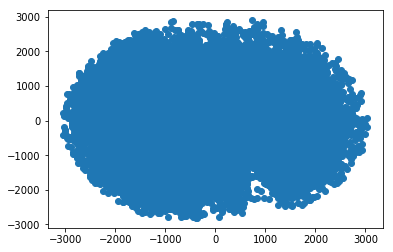

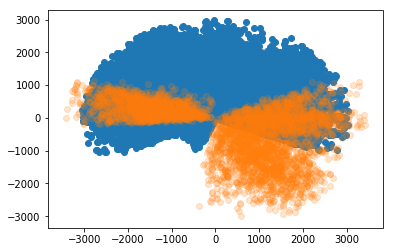

In [17]:
plt.scatter(x_sdss_arr[inds], y_sdss_arr[inds])
plt.figure()
plt.scatter(x_sdss_arr[inds], z_sdss_arr[inds])
plt.scatter(x_cart_arr, z_cart_arr, alpha=0.2)

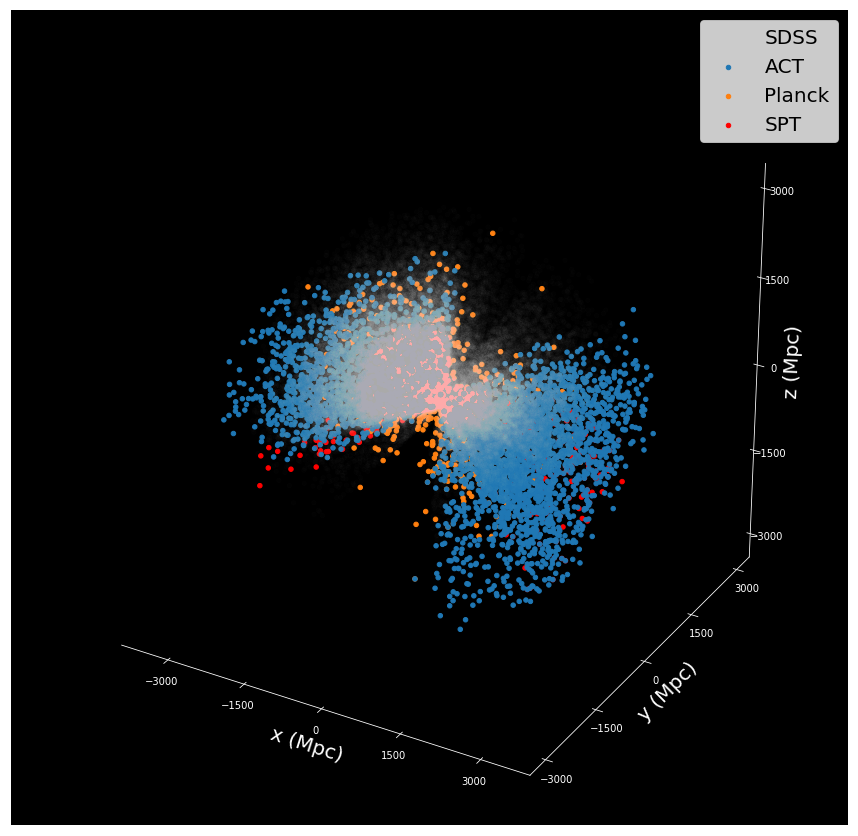

In [34]:
from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}) #'axes.edgecolor':'white', 

ax.set_facecolor('k')

plt.ion()
sdss_plt = ax.scatter(x_sdss_arr[inds], y_sdss_arr[inds], z_sdss_arr[inds], alpha=0.01, s=20, color='w', label='SDSS')
act_plt = ax.scatter(x_cart_arr, y_cart_arr, z_cart_arr, alpha=1.0, s=20, label='ACT')
planck_plt = ax.scatter(x_planck_arr, y_planck_arr, z_planck_arr, alpha=1.0, label='Planck')
spt_plt = ax.scatter(spt_x_cart_arr, spt_y_cart_arr, spt_z_cart_arr, alpha=1.0, s=20, color='r', label='SPT')


ax.legend(fontsize=20)
# Hide grid lines
ax.grid(False)

ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# Hide axes ticks
ax.set_xticks([-3000,-1500,0,1500,3000])
ax.set_yticks([-3000,-1500,0,1500,3000])
ax.set_zticks([-3000,-1500,0,1500,3000])
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

ax.set_xlabel('x (Mpc)', fontsize=20, color='w')
ax.set_ylabel('y (Mpc)', fontsize=20, color='w')
ax.set_zlabel('z (Mpc)', fontsize=20, color='w')

plt.show()

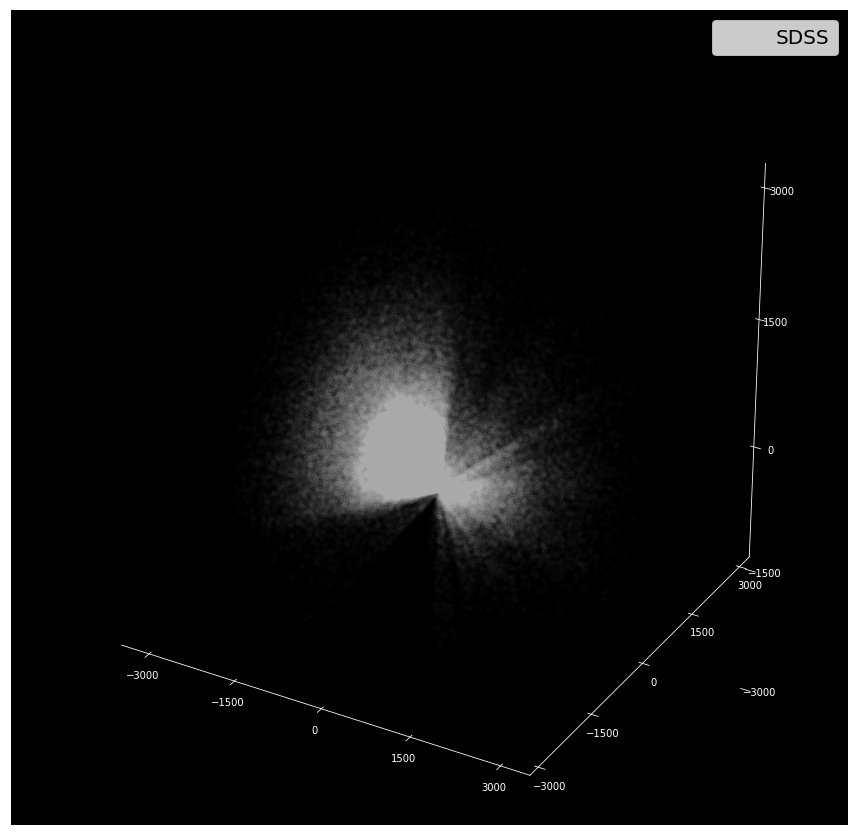

0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [38]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('k')
plt.rc_context({'xtick.color':'white', 'ytick.color':'white'}) #'axes.edgecolor':'white', 
plt.ion()
sdss_plt = ax.scatter(x_sdss_arr[inds], y_sdss_arr[inds], z_sdss_arr[inds], alpha=0.01, s=20, color='w', label='SDSS')
# act_plt = ax.scatter(x_cart_arr, y_cart_arr, z_cart_arr, alpha=1.0, s=20, label='ACT')
# planck_plt = ax.scatter(x_planck_arr, y_planck_arr, z_planck_arr, alpha=1.0, label='Planck')
# spt_plt = ax.scatter(spt_x_cart_arr, spt_y_cart_arr, spt_z_cart_arr, alpha=1.0, s=20, color='r', label='SPT')


ax.legend(fontsize=20)
# Hide grid lines
ax.grid(False)

ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))

# Hide axes ticks
ax.set_xticks([-3000,-1500,0,1500,3000])
ax.set_yticks([-3000,-1500,0,1500,3000])
ax.set_zticks([-3000,-1500,0,1500,3000])
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.show()

def animate(i):
    print(i)
    chunk = 30
    if i <chunk:
        line = ax.scatter(x_cart_arr, y_cart_arr, z_cart_arr, alpha=1.0, s=20, color='b', label='ACT')
        rate = (chunk-i) / chunk
        line.set_alpha(rate)
    elif i >= chunk and i < (chunk*2):
        line2 = ax.scatter(x_cart_arr, y_cart_arr, z_cart_arr, alpha=1.0, s=20, color='b', label='ACT')
        line = ax.scatter(x_planck_arr, y_planck_arr, z_planck_arr, alpha=1.0, color='orange', label='Planck')
        rate = (2*chunk-i) / chunk
        line.set_alpha(rate)
        line2.set_alpha(0)
    elif i >= 2*chunk and i <3*chunk:
        line2 = ax.scatter(x_planck_arr, y_planck_arr, z_planck_arr, alpha=1.0, color='orange', label='Planck')
        line = ax.scatter(spt_x_cart_arr, spt_y_cart_arr, spt_z_cart_arr, alpha=1.0, s=20, color='r', label='SPT')
        rate = (3*chunk-i) / chunk
        line.set_alpha(rate) 
        line2.set_alpha(0)
    plt.show()
    return (line,)

anim = FuncAnimation(fig, animate, frames=90, interval=20, blit=True)

HTML(anim.to_html5_video())

# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     act_plt.set_alpha(rate)
# #     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     planck_plt.set_alpha(rate)
# #     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
# #     act_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(0, 11, 1)]:
#     act_plt.set_alpha(rate)
#     spt_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# for rate in [0.1 * x for x in range(10, -1, -1)]:
#     act_plt.set_alpha(rate)
#     planck_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.pause(1.0)
# for rate in [0.1 * x for x in range(0, 11, 1)]:
#     act_plt.set_alpha(rate)
#     planck_plt.set_alpha(rate)
#     plt.draw()
#     plt.pause(0.1)
# plt.ioff()
# plt.show()


In [ ]:
# plt.axes(projection = 'polar')
# plt.polar(sdss_ra[inds], sdss_z[inds], 'k.', label = 'SDSS')
# plt.polar(ra_arr, z_arr, 'b.', label='ACT', alpha=0.5)
# plt.polar(ra_planck_vals, z_planck_vals, 'y.', label='Planck', alpha=0.5)
# plt.polar(spt_ra_arr, spt_z_arr, 'r.', label='SPT', alpha=0.5)

# plt.legend()

